逻辑回归预测芯片质量通过

1.基于csv 数据，建立逻辑回归模型（二阶边界），评估模型表项；
2.以函数方式求解边界曲线
3.描绘出完整的决策边界曲线

In [19]:
#load data；visualize data；generate new data；
#establish mode and train it；predict
#accuracy
#decision boundary
#define f(x)


In [20]:
import pandas as pd
import numpy as np

data = pd.read_csv('chip_test_data.csv')
data.head()

,test1,test2,pass
0,0.374540,0.185133,0
1,0.950714,0.541901,0
2,0.731994,0.872946,0
3,0.598658,0.732225,1
4,0.156019,0.806561,0


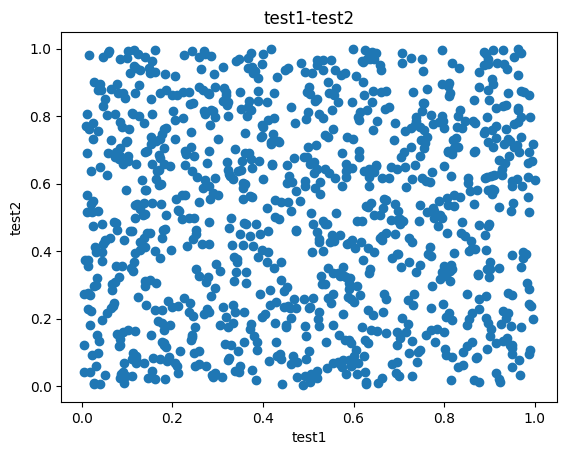

In [21]:
#visualize the data
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:,'test1'], data.loc[:, 'test2'])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.show()

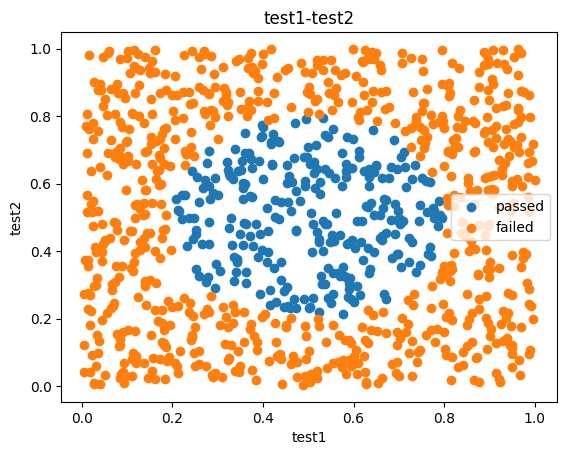

In [22]:
mask = data.loc[:, 'pass'] == 1
flg2 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:,"test2"][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:,"test2"][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed),('passed', 'failed'))
plt.show()

In [23]:
x = data.drop(['pass'], axis=1)
y = data.loc[:, 'pass']
x1 = data.loc[:, 'test1']
x2 = data.loc[:, 'test2']

x1_2 = x1*x1
x2_2 = x2*x2
x1_x2 = x1*x2

x_new = {'x1':x1, 'x2':x2, 'x1_2': x1_2, 'x2_2':x2*x2, 'x1_x2':x1*x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1        x2      x1_2      x2_2     x1_x2
0    0.374540  0.185133  0.140280  0.034274  0.069340
1    0.950714  0.541901  0.903858  0.293657  0.515193
2    0.731994  0.872946  0.535815  0.762034  0.638991
3    0.598658  0.732225  0.358392  0.536153  0.438353
4    0.156019  0.806561  0.024342  0.650541  0.125839
..        ...       ...       ...       ...       ...
995  0.091582  0.656955  0.008387  0.431590  0.060165
996  0.917314  0.956615  0.841464  0.915112  0.877516
997  0.136819  0.068958  0.018719  0.004755  0.009435
998  0.950237  0.057055  0.902951  0.003255  0.054216
999  0.446006  0.282187  0.198921  0.079630  0.125857

[1000 rows x 5 columns]


In [24]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_new, y)

from sklearn.metrics import accuracy_score
y2_predict = LR.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict)
print(accuracy2)

0.727


In [40]:
x1_new = x1.sort_values()
theta0 = LR.intercept_
theta1,theta2,theta3,theta4,theta5 = LR.coef_[0][0],LR.coef_[0][1],LR.coef_[0][2],LR.coef_[0][3],LR.coef_[0][4]
a = theta4
b = theta5*x1_new + theta2
c = theta0 + theta1*x1_new + theta3*x1_new*x1_new
#x2_new_boundary = (-b+np.sqrt(b*b - 4*a*c))/(2*a)
#D = np.maximum(b*b - 4*a*c, 0)
#x2_new_boundary = (-b + np.sqrt(D)) / (2*a)
x2_new_boundary = (-b + np.sqrt(np.maximum(b*b - 4*a*c + 1e-3, 0))) / (2*a)
print(x2_new_boundary)
#print(x1_new.shape, x2_new_boundary.shape)

821    0.375346
208    0.375424
72     0.375507
128    0.375765
205    0.376170
         ...   
390    0.553235
475    0.553678
532    0.554341
847    0.554384
531    0.554897
Name: test1, Length: 1000, dtype: float64


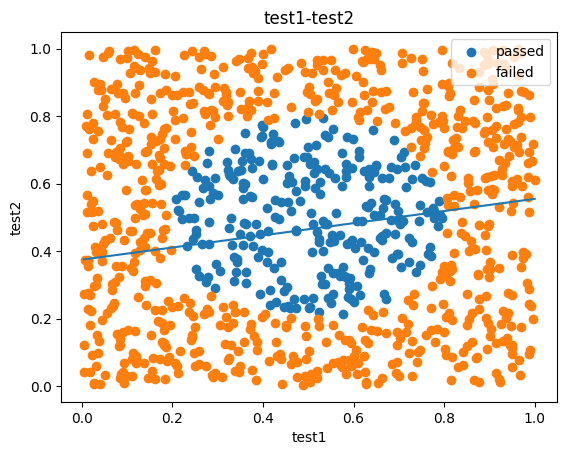

In [41]:
fig5 = plt.figure()
passed = plt.scatter(data.loc[:, 'test1'][mask], data.loc[:,"test2"][mask])
failed = plt.scatter(data.loc[:, 'test1'][~mask], data.loc[:,"test2"][~mask])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed, failed),('passed', 'failed'))
plt.plot(x1_new, x2_new_boundary)
plt.show()